#Data Collection

##Data Source

All the data is fetched from U.S. Energy Information Administration (EIA) API. Multiple data are fetched to capture a comprehensive view of the natural gas market dynamics.
https://www.eia.gov/opendata/

Data are fetched since 2013, have daily (prices), weekly, and monthly cadence.

Here’s a detailed explanation for each dataset and why it was selected.

##Data Topics
###Natural Gas Futures Prices
Futures prices represent market expectations of natural gas prices over time, serving as a leading indicator for forecasting and risk management.

Daily frequency ensures granular and timely data.

###Natural Gas Summary
Monthly volumes and prices of natural gas consumption by sector, as well as production, storage, imports and exports, and weathe, giving a holistic view of the natural gas supply chain.

###Natural Gas Import by Country
Tracks the volume and price of imports from different countries, shedding light on international dependencies and trade patterns.

###Natural Gas Export by Country
Examines exports by country to understand the role of the U.S. in the global natural gas market and its impact on domestic availability and prices.

###Natural Gas Import by Point of Entry
Provides a granular view of import data at specific entry points, revealing regional supply dynamics.

###Natural Gas Export by Point of Exit
Tracks exports from specific exit points, enabling analysis of regional export trends and their implications for the domestic market.

###Natural Gas Weekly Underground Storage
Weekly data provides short-term insights into storage levels, a key factor in price volatility, particularly during peak demand seasons.

###Petroleum Spot Price
 Natural gas prices often correlate with petroleum prices due to shared production and transportation infrastructure.

 Daily frequency captures high-frequency price movements.

###Petroleum Future Price
Complements spot prices by reflecting long-term market expectations for petroleum, which can influence natural gas pricing.

Daily data allows integration into predictive models, often insights market sentiment.

In [ ]:
import requests
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [ ]:
def get_eia_data(api_key, base_url, params):
    """
    Generalized function to fetch data from the EIA API.

    Parameters:
        api_key (str): Your EIA API key.
        base_url (str): The base URL of the dataset endpoint (e.g., natural gas prices, electricity data).
        params (dict): Dictionary of query parameters, including frequency, sorting, and filters.

    Returns:
        pd.DataFrame: A DataFrame containing the requested data, or None if no data is found.
    """
    # Ensure the API key is included in the parameters
    params['api_key'] = api_key

    # Make the API request
    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        # Parse the response JSON to a DataFrame
        data = response.json()
        if 'response' in data and 'data' in data['response']:
            df = pd.DataFrame(data['response']['data'])
            return df
        else:
            print("No data found in the response.")
            return None
    else:
        print("Error: Unable to fetch data.")
        print("HTTP Status Code:", response.status_code)
        print("Response:", response.text)
        return None

In [ ]:
api_key = "7BnLZv5hZjNUQV1gKUUKWE0T343OA5ebBaCTy69L"

datasets = [
        {
            "name": "Natural Gas Futures Prices",
            "base_url": "https://api.eia.gov/v2/natural-gas/pri/fut/data/",
            "params": {
                'frequency': 'daily',
                'data[0]': 'value',
                'sort[0][column]': 'period',
                'sort[0][direction]': 'desc',
                'offset': 0,
                'length': 5000
            },
            "recurrent": True,  # Recurrent fetching enabled
            "start_date": "2013-01",  # Earliest date to fetch
            "end_date": "2025-01",    # Latest date to fetch
            "period_length": {"months": 24}
        },
        {
            "name": "Natural Gas Summary",
            "base_url": "https://api.eia.gov/v2/natural-gas/sum/lsum/data/",
            "params": {
                'frequency': 'monthly',
                'data[0]': 'value',
                'sort[0][column]': 'period',
                'sort[0][direction]': 'desc',
                'offset': 0,
                'length': 5000
            },
            "recurrent": True,  # Recurrent fetching enabled
            "start_date": "2013-01",  # Earliest date to fetch
            "end_date": "2025-01",    # Latest date to fetch
            "period_length": {"months": 4}  # Fetch 4 months at a time
        },
        {
            "name": "Natural Gas Import by Country",
            "base_url": "https://api.eia.gov/v2/natural-gas/move/impc/data/",
            "params": {
                'frequency': 'monthly',
                'data[0]': 'value',
                'sort[0][column]': 'period',
                'sort[0][direction]': 'desc',
                'offset': 0,
                'length': 5000
            },
            "recurrent": True,  # Recurrent fetching enabled
            "start_date": "2013-01",  # Earliest date to fetch
            "end_date": "2025-01",    # Latest date to fetch
            "period_length": {"months": 72}
        },
        {
            "name": "Natural Gas Export by Country",
            "base_url": "https://api.eia.gov/v2/natural-gas/move/expc/data/",
            "params": {
                'frequency': 'monthly',
                'data[0]': 'value',
                'sort[0][column]': 'period',
                'sort[0][direction]': 'desc',
                'offset': 0,
                'length': 5000
            },
            "recurrent": True,
            "start_date": "2013-01",  # Earliest date to fetch
            "end_date": "2025-01",    # Latest date to fetch
            "period_length": {"months": 30}  # Fetch 4 months at a time
        },
        {
            "name": "Natural Gas Import by Point of Entry",
            "base_url": "https://api.eia.gov/v2/natural-gas/move/poe1/data/",
            "params": {
                'frequency': 'monthly',
                'data[0]': 'value',
                'sort[0][column]': 'period',
                'sort[0][direction]': 'desc',
                'offset': 0,
                'length': 5000
            },
            "recurrent": True,
            "start_date": "2013-01",  # Earliest date to fetch
            "end_date": "2025-01",    # Latest date to fetch
            "period_length": {"months": 30}  # Fetch 4 months at a time
        },
        {
            "name": "Natural Gas Export by Point of Exit",
            "base_url": "https://api.eia.gov/v2/natural-gas/move/poe2/data/",
            "params": {
                'frequency': 'monthly',
                'data[0]': 'value',
                'sort[0][column]': 'period',
                'sort[0][direction]': 'desc',
                'offset': 0,
                'length': 5000
            },
            "recurrent": True,
            "start_date": "2013-01",  # Earliest date to fetch
            "end_date": "2025-01",    # Latest date to fetch
            "period_length": {"months": 12}  # Fetch 4 months at a time
        },
        {
            "name": "Natural Gas Weekly Underground Storage",
            "base_url": "https://api.eia.gov/v2/natural-gas/stor/wkly/data/",
            "params": {
                'frequency': 'weekly',
                'data[0]': 'value',
                'sort[0][column]': 'period',
                'sort[0][direction]': 'desc',
                'offset': 0,
                'length': 5000
            },
            "recurrent": True,
            "start_date": "2013-01",  # Earliest date to fetch
            "end_date": "2025-01",    # Latest date to fetch
            "period_length": {"months": 48}
        },
        {
            "name": "Petroleum Spot Price",
            "base_url": "https://api.eia.gov/v2/petroleum/pri/spt/data/",
            "params": {
                'frequency': 'daily',
                'data[0]': 'value',
                'sort[0][column]': 'period',
                'sort[0][direction]': 'desc',
                'offset': 0,
                'length': 5000
            },
            "recurrent": True,
            "start_date": "2013-01",  # Earliest date to fetch
            "end_date": "2025-01",    # Latest date to fetch
            "period_length": {"months": 18}
        },
        {
            "name": "Petroleum Future Price",
            "base_url": "https://api.eia.gov/v2/petroleum/pri/fut/data/",
            "params": {
                'frequency': 'daily',
                'data[0]': 'value',
                'sort[0][column]': 'period',
                'sort[0][direction]': 'desc',
                'offset': 0,
                'length': 5000
            },
            "recurrent": True,
            "start_date": "2013-01",  # Earliest date to fetch
            "end_date": "2025-01",    # Latest date to fetch
            "period_length": {"months": 18}
        }
    ]


In [ ]:
def fetch_recurrently(
    api_key: str,
    base_url: str,
    params_template: dict,
    start_date: str,
    end_date: str,
    period_length: dict
) -> pd.DataFrame:
    """
    Fetch data recurrently in chunks of specified period length until reaching the start_date.

    Parameters:
        api_key (str): Your EIA API key.
        base_url (str): Base URL of the dataset endpoint.
        params_template (dict): Template for API query parameters.
        start_date (str): Earliest date to fetch (e.g., "2020-06").
        end_date (str): Latest date to fetch (e.g., "2024-06").
        period_length (dict): Period length for each fetch (e.g., {'months': 4}).

    Returns:
        pd.DataFrame: Combined DataFrame of all fetched data.
    """
    all_data = []
    current_end = pd.to_datetime(end_date)  # Start from the latest date

    while current_end > pd.to_datetime(start_date):
        # Calculate the start of the chunk
        current_start = current_end - pd.DateOffset(**period_length)
        current_start_str = current_start.strftime("%Y-%m")
        current_end_str = current_end.strftime("%Y-%m")

        # Construct the parameters
        params = params_template.copy()
        params["start"] = current_start_str
        params["end"] = current_end_str
        params["api_key"] = api_key  # Ensure the API key is included

        print(f"Fetching data for range: {current_start_str} to {current_end_str}")

        # Fetch the data
        df_temp = get_eia_data(api_key, base_url, params)

        if df_temp is None or df_temp.empty:
            print(f"No data found for range: {current_start_str} to {current_end_str}.")
            break

        all_data.append(df_temp)
        print(f"  Fetched {df_temp.shape[0]} rows.")

        # Update current_end for the next iteration
        current_end = current_start

    # Combine all fetched data into a single DataFrame
    combined_data = pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()
    return combined_data

def fetch_all_datasets(api_key: str, datasets: list) -> dict:
    """
    Loops over `datasets` to fetch each dataset using `fetch_recurrently`.
    Returns a dictionary of { dataset_name: DataFrame }.

    Supports recurrent fetching for datasets requiring multiple API calls.
    """
    dataframes = {}

    for ds in datasets:
        name = ds["name"]
        print(f"Fetching data for: {name}")

        if "recurrent" in ds and ds["recurrent"]:
            # Perform recurrent fetching for datasets requiring it
            df_temp = fetch_recurrently(
                api_key=api_key,
                base_url=ds["base_url"],
                params_template=ds["params"],
                start_date=ds["start_date"],
                end_date=ds["end_date"],
                period_length=ds["period_length"]
            )
        else:
            # Fetch normally for datasets without recurrent fetching
            df_temp = get_eia_data(api_key, ds["base_url"], ds["params"])

        if df_temp is None or df_temp.empty:
            print(f"  No data returned for {name}. Skipping.\n")
            continue

        dataframes[name] = df_temp
        print(f"  Shape: {df_temp.shape}")
        print(df_temp)
        print("\n")

    return dataframes


In [ ]:
dataframes = fetch_all_datasets(api_key, datasets)

Fetching data for: Natural Gas Futures Prices
Fetching data for range: 2023-01 to 2025-01
  Fetched 1764 rows.
Fetching data for range: 2021-01 to 2023-01
  Fetched 2505 rows.
Fetching data for range: 2019-01 to 2021-01
  Fetched 2559 rows.
Fetching data for range: 2017-01 to 2019-01
  Fetched 2548 rows.
Fetching data for range: 2015-01 to 2017-01
  Fetched 2501 rows.
Fetching data for range: 2013-01 to 2015-01
  Fetched 2517 rows.
  Shape: (14394, 11)
           period duoarea      area-name product product-name process  \
0      2024-12-31     RGC             NA    EPG0  Natural Gas     PS0   
1      2024-12-30     RGC             NA    EPG0  Natural Gas     PS0   
2      2024-12-27     RGC             NA    EPG0  Natural Gas     PS0   
3      2024-12-26     RGC             NA    EPG0  Natural Gas     PS0   
4      2024-12-24     RGC             NA    EPG0  Natural Gas     PS0   
...           ...     ...            ...     ...          ...     ...   
14389  2013-01-02   Y35NY  NEW Y

#Data Preprocessing

After fetching all the desired datasets, in this section we will prepare datasets for analysis, including cleaning, handling missing values, and transforming variables (e.g., scaling, feature engineering).

First, we will merge all the dataset to a single dataframe, handle data types, dropping duplicates columns and conduct one-hot encoding.

Then, we will clean the dataset and handle missing values.

Last but not least, basic feature engineering are conducted.


In [ ]:
def transform_eia_data(dataframes: dict) -> pd.DataFrame:
    """
    1) Gas Futures (spot price):
       - Pivot the dataset using 'duoarea + process-name + units' as 'unique_col'.
       - Ensure 'period', 'week', and 'month' columns are retained.

    2) Monthly datasets:
       - Convert 'period' -> datetime
       - Create 'month'
       - Drop 'period' (so it won't collide with the Gas Futures 'period')
       - One-hot encode
       - Drop duplicates on 'month' to ensure at most one row per month.

    3) Weekly datasets:
       - Convert 'period' -> datetime
       - Create 'week'
       - Drop 'period'
       - One-hot encode
       - Drop duplicates on 'week' to ensure at most one row per week.

    4) Daily datasets:
       - Convert 'period' -> datetime
       - Retain 'period'
       - One-hot encode
       - Drop duplicates on 'period' to ensure at most one row per day.

    5) Drop duplicate columns across DataFrames (except 'period','week','month').

    6) Merge:
       - Start with Gas Futures as df_combined (left).
       - For daily data: merge on 'period' with how='left'.
       - For weekly data: merge on 'week' with how='left'.
       - For monthly data: merge on 'month' with how='left'.
       => Because the other DFs no longer have 'period', there's no suffix rename
          (i.e. no 'period_x'/'period_y').

    7) Return the final DataFrame containing Gas Futures' 'period'.
    """

    # ----------------------------------------------------------------
    # 1) Identify dataset names
    # ----------------------------------------------------------------
    GAS_FUTURES_NAME = "Natural Gas Futures Prices"

    monthly_datasets = [
        "Natural Gas Import by Country",
        "Natural Gas Export by Country",
        "Natural Gas Import by Point of Entry",
        "Natural Gas Export by Point of Exit",
        "Natural Gas Summary"
    ]
    weekly_datasets = [
        "Natural Gas Weekly Underground Storage"
    ]
    daily_datasets = [
        "Petroleum Spot Price",
        "Petroleum Future Price"
    ]

    # ----------------------------------------------------------------
    # 2) Process Gas Futures (Spot Price)
    # ----------------------------------------------------------------
    df_futures = dataframes[GAS_FUTURES_NAME].copy()

    # (a) Convert 'period' -> datetime
    df_futures["period"] = pd.to_datetime(df_futures["period"], errors="coerce")

    # (b) Create 'week' (Friday-based) and 'month' (YYYY-MM)
    def get_friday(dt: pd.Timestamp) -> pd.Timestamp:
        if pd.isnull(dt):
            return pd.NaT
        offset = (4 - dt.weekday()) % 7  # Friday=4, Monday=0
        return dt + pd.Timedelta(days=offset)

    df_futures["week"] = df_futures["period"].apply(get_friday).dt.strftime("%Y-%m-%d")
    df_futures["month"] = df_futures["period"].dt.to_period("M").dt.to_timestamp()

    # (c) Build the 'unique_col' for pivoting
    df_futures["unique_col"] = (
        df_futures["duoarea"].astype(str) + "_"
        + df_futures["process-name"].astype(str) + "_"
        + df_futures["units"].astype(str)
    )

    # (d) Pivot the dataset
    pivoted_futures = df_futures.pivot_table(
        index="period",          # Keep 'period' as the unique identifier for rows
        columns="unique_col",    # Columns based on unique_col
        values="value",          # Values in the pivot table
        aggfunc="max"           # Use average in case of duplicates
    )

    # Reset index to make 'period' a column again and sort by period descending
    pivoted_futures.reset_index(inplace=True)
    pivoted_futures.sort_values(by="period", ascending=False, inplace=True)

    # Merge back 'week' and 'month' into the pivoted DataFrame
    df_futures = pd.merge(
        pivoted_futures,
        df_futures[["period", "week", "month"]].drop_duplicates(),
        on="period",
        how="left"
    )

    # Put into final_dfs
    final_dfs = {GAS_FUTURES_NAME: df_futures}

    # ----------------------------------------------------------------
    # 3) Process Other Datasets (Monthly / Weekly / Daily)
    # ----------------------------------------------------------------
    def one_hot_encode_unique_col(df: pd.DataFrame) -> pd.DataFrame:
        """
        Combine (duoarea, process-name, units) -> 'unique_col' for pivoting.
        Use pivot to ensure one row per period, with values in separate columns.
        Aggregate values using average if duplicates exist.
        """

        # Build the 'unique_col' for pivoting
        df["unique_col"] = (
            df["duoarea"].astype(str) + "_"
            + df["product-name"].astype(str) + "_"
            + df["process-name"].astype(str) + "_"
            + df["units"].astype(str)
        )

        # Determine the index to use for pivoting
        if "period" in df.columns:
            index_column = "period"
        elif "month" in df.columns:
            index_column = "month"
        elif "week" in df.columns:
            index_column = "week"

        # Pivot the table
        pivoted_df = df.pivot_table(
            index=index_column,      # Use the determined index column
            columns="unique_col",    # Columns based on unique_col
            values="value",          # Values in the pivot table
            aggfunc="max"           # Use average in case of duplicates
        )

        # Reset index to make the time-based column a normal column
        pivoted_df.reset_index(inplace=True)

        return pivoted_df


    # Process datasets
    for ds_name, df_raw in dataframes.items():
        # Skip the Gas Futures dataset
        if ds_name == GAS_FUTURES_NAME:
            continue

        df_copy = df_raw.copy()

        # (a) Process Monthly Datasets
        if ds_name in monthly_datasets:
            # Convert 'period' to datetime and extract 'month'
            df_copy["period"] = pd.to_datetime(df_copy["period"], format="%Y-%m", errors="coerce")
            df_copy["month"] = df_copy["period"].dt.to_period("M").dt.to_timestamp()

            # Drop 'period' to avoid duplication
            df_copy.drop(columns=["period"], inplace=True, errors="ignore")

            # Ensure 'value' exists
            if "value" not in df_copy.columns:
                df_copy["value"] = 0.0

            # Perform one-hot encoding
            df_encoded = one_hot_encode_unique_col(df_copy)

            # Drop duplicates to ensure one row per 'month'
            df_encoded.drop_duplicates(subset=["month"], keep="first", inplace=True)

        # (b) Process Weekly Datasets
        elif ds_name in weekly_datasets:
            # Convert 'period' to datetime
            df_copy["period"] = pd.to_datetime(df_copy["period"], format="%Y-%m-%d", errors="coerce")

            # Helper function to calculate week-ending Friday
            def get_friday(dt: pd.Timestamp) -> pd.Timestamp:
                if pd.isnull(dt):
                    return pd.NaT
                offset = (4 - dt.weekday()) % 7  # Friday=4
                return dt + pd.Timedelta(days=offset)

            # Create 'week' column based on week-ending Friday
            df_copy["week"] = df_copy["period"].apply(get_friday).dt.strftime("%Y-%m-%d")

            # Drop 'period' to avoid duplication
            df_copy.drop(columns=["period"], inplace=True, errors="ignore")

            # Ensure 'value' exists
            if "value" not in df_copy.columns:
                df_copy["value"] = 0.0

            # Perform one-hot encoding
            df_encoded = one_hot_encode_unique_col(df_copy)

            # Drop duplicates to ensure one row per 'week'
            df_encoded.drop_duplicates(subset=["week"], keep="first", inplace=True)

        # (c) Process Daily Datasets
        elif ds_name in daily_datasets:
            # Convert 'period' to datetime
            df_copy["period"] = pd.to_datetime(df_copy["period"], format="%Y-%m-%d", errors="coerce")

            # Ensure 'value' exists
            if "value" not in df_copy.columns:
                df_copy["value"] = 0.0

            # Perform one-hot encoding
            df_encoded = one_hot_encode_unique_col(df_copy)

            # Drop duplicates to ensure one row per 'period'
            df_encoded.drop_duplicates(subset=["period"], keep="first", inplace=True)

        # Store the processed DataFrame in final_dfs
        final_dfs[ds_name] = df_encoded

    # ----------------------------------------------------------------
    # 4) Drop Duplicate Columns (except 'period','week','month')
    # ----------------------------------------------------------------
    columns_dict = defaultdict(list)
    for ds_name, df_ in final_dfs.items():
        for col in df_.columns:
            columns_dict[col].append(ds_name)

    duplicates = {c: ds_list for c, ds_list in columns_dict.items() if len(ds_list) > 1}
    if duplicates:
        print("\n[DEBUG] Duplicate columns found across DataFrames:")
        for col, ds_list in duplicates.items():
            print(f"  - '{col}' in: {ds_list}")

        keep_always = {"period", "week", "month"}
        already_kept = {}
        for col, ds_list in duplicates.items():
            if col in keep_always:
                continue  # keep in all
            already_kept[col] = ds_list[0]

        # Drop from subsequent DFs
        for col, ds_list in duplicates.items():
            if col in keep_always:
                continue
            first_ds = already_kept[col]
            for name_ in ds_list:
                if name_ != first_ds:
                    final_dfs[name_].drop(columns=[col], errors="ignore", inplace=True)

        print("[DEBUG] Duplicates dropped.\n")


    # ----------------------------------------------------------------
    # 5) MERGE (Left Join)
    # ----------------------------------------------------------------
    df_combined = final_dfs[GAS_FUTURES_NAME].copy()
    df_combined["month"] = pd.to_datetime(df_combined["month"], format="%Y-%m", errors="coerce")

    # Merge daily data first on 'period'
    for ds_name in daily_datasets:
        if ds_name not in final_dfs:
            continue
        df_d = final_dfs[ds_name]
        if "period" not in df_d.columns:
            continue
        print(f"[DEBUG] Merging daily dataset '{ds_name}' on 'period'")
        df_combined = df_combined.merge(df_d, on="period", how="left")
        print(f"  => shape after merge: {df_combined.shape}")

    # Merge weekly data on 'week'
    for ds_name in weekly_datasets:
        if ds_name not in final_dfs:
            continue
        df_w = final_dfs[ds_name]
        if "week" not in df_w.columns:
            continue
        print(f"[DEBUG] Merging weekly dataset '{ds_name}' on 'week'")
        df_combined = df_combined.merge(df_w, on="week", how="left")
        print(f"  => shape after merge: {df_combined.shape}")

    # Merge monthly data on 'month'
    for ds_name in monthly_datasets:
        if ds_name not in final_dfs:
            continue
        df_m = final_dfs[ds_name]
        if "month" not in df_m.columns:
            continue
        print(f"[DEBUG] Merging monthly dataset '{ds_name}' on 'month'")
        df_m["month"] = pd.to_datetime(df_m["month"], format="%Y-%m", errors="coerce")
        df_combined = df_combined.merge(df_m, on="month", how="left")
        print(f"  => shape after merge: {df_combined.shape}")

    cols_to_drop = [
        "duoarea", "area-name", "product", "product-name", "process",
        "process-name", "series", "series-description", "units"
    ]
    df_combined.drop(columns=[col for col in cols_to_drop if col in df_combined.columns],
                      inplace=True, errors="ignore")

    return df_combined

In [ ]:
df_combined = transform_eia_data(dataframes)



[DEBUG] Duplicate columns found across DataFrames:
  - 'period' in: ['Natural Gas Futures Prices', 'Petroleum Spot Price', 'Petroleum Future Price']
  - 'week' in: ['Natural Gas Futures Prices', 'Natural Gas Weekly Underground Storage']
  - 'month' in: ['Natural Gas Futures Prices', 'Natural Gas Summary', 'Natural Gas Import by Country', 'Natural Gas Export by Country', 'Natural Gas Import by Point of Entry', 'Natural Gas Export by Point of Exit']
  - 'NUS-Z00_Natural Gas_Imports Price_$/MCF' in: ['Natural Gas Summary', 'Natural Gas Import by Country']
  - 'NUS-Z00_Natural Gas_LNG Imports (Price)_$/MCF' in: ['Natural Gas Summary', 'Natural Gas Import by Country', 'Natural Gas Import by Point of Entry']
  - 'NUS-Z00_Natural Gas_Liquefied Natural Gas Exports Price_$/MCF' in: ['Natural Gas Summary', 'Natural Gas Export by Country', 'Natural Gas Export by Point of Exit']
  - 'NUS-Z00_Natural Gas_Liquefied Natural Gas Exports_MMCF' in: ['Natural Gas Summary', 'Natural Gas Export by Country

In [ ]:
df_combined

,period,RGC_Spot Price_$/MMBTU,Y35NY_Future Contract 1_$/MMBTU,Y35NY_Future Contract 2_$/MMBTU,Y35NY_Future Contract 3_$/MMBTU,Y35NY_Future Contract 4_$/MMBTU,week,month,RGC_Conventional Regular Gasoline_Spot Price FOB_$/GAL,RGC_Kerosene-Type Jet Fuel_Spot Price FOB_$/GAL,...,SWY_Natural Gas_Underground Storage Injections_MMCF,SWY_Natural Gas_Underground Storage Net Withdrawals_MMCF,SWY_Natural Gas_Underground Storage Withdrawals_MMCF,SWY_Natural Gas_Underground Storage Working Gas_MMCF,SWY_Natural Gas_Vehicle Fuel Consumption_MMCF,SWY_Natural Gas_Vented and Flared_MMCF,SWY_Natural Gas_Withdrawals from Coalbed Wells_MMCF,SWY_Natural Gas_Withdrawals from Gas Wells_MMCF,SWY_Natural Gas_Withdrawals from Oil Wells_MMCF,SWY_Natural Gas_Withdrawals from Shale Gas_MMCF
0,2024-12-31,3.4,NaN,NaN,NaN,NaN,2025-01-03,2024-12-01,2.01,2.228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-12-30,3.39,NaN,NaN,NaN,NaN,2025-01-03,2024-12-01,2.008,2.189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-12-27,2.91,NaN,NaN,NaN,NaN,2024-12-27,2024-12-01,1.98,2.122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-26,2.96,NaN,NaN,NaN,NaN,2024-12-27,2024-12-01,1.988,2.089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-24,2.95,NaN,NaN,NaN,NaN,2024-12-27,2024-12-01,2.013,2.095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,2013-01-08,3.21,3.218,3.234,3.275,3.33,2013-01-11,2013-01-01,2.682,3.088,...,3,6183,6186,23395,2,3671,29849,144463,1781,1059
3056,2013-01-07,3.3,3.266,3.281,3.318,3.374,2013-01-11,2013-01-01,2.653,3.033,...,3,6183,6186,23395,2,3671,29849,144463,1781,1059
3057,2013-01-04,3.2,3.287,3.303,3.337,3.393,2013-01-04,2013-01-01,2.672,2.991,...,3,6183,6186,23395,2,3671,29849,144463,1781,1059
3058,2013-01-03,3.19,3.198,3.214,3.25,3.306,2013-01-04,2013-01-01,2.651,2.994,...,3,6183,6186,23395,2,3671,29849,144463,1781,1059


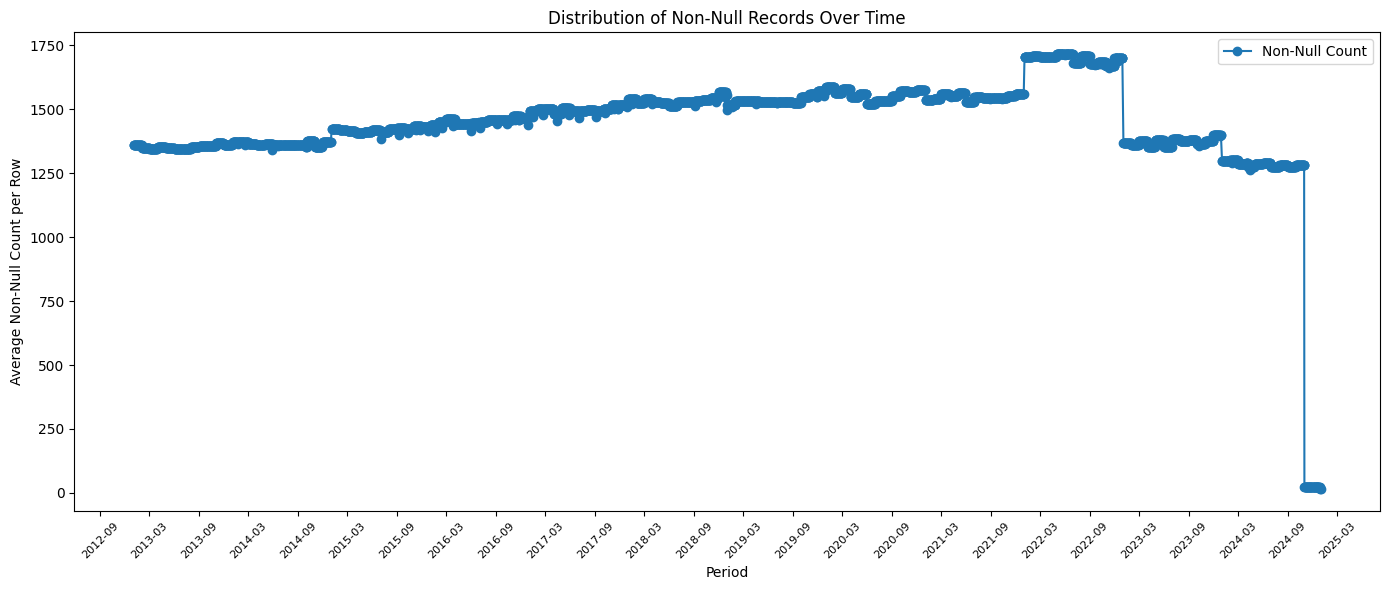

In [ ]:
df_combined["non_null_count"] = df_combined.notnull().sum(axis=1)

# Group by 'month' and calculate the average or total non-null count
grouped_data = df_combined.groupby("period")["non_null_count"].mean()
x_axis = "period"

# Convert x-axis to include months in a readable format
grouped_data.index = pd.to_datetime(grouped_data.index)

# Plot the distribution
plt.figure(figsize=(14, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', label='Non-Null Count')

# Customize the x-axis to show year and month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set major ticks every 6 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as 'YYYY-MM'

# Customize the plot
plt.xlabel(x_axis.capitalize())
plt.ylabel("Average Non-Null Count per Row")
plt.title("Distribution of Non-Null Records Over Time")
plt.xticks(rotation=45, fontsize=8)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the date four months ago
four_months_ago = datetime(2024, 9, 1)

# Ensure the 'month' column is in datetime format
df_combined["month"] = pd.to_datetime(df_combined["month"], errors="coerce")

# Filter the DataFrame for rows prior to four months ago (<= 2024-09-01)
filtered_df = df_combined[df_combined["month"] <= four_months_ago]

filtered_df.head()

,period,RGC_Spot Price_$/MMBTU,Y35NY_Future Contract 1_$/MMBTU,Y35NY_Future Contract 2_$/MMBTU,Y35NY_Future Contract 3_$/MMBTU,Y35NY_Future Contract 4_$/MMBTU,week,month,RGC_Conventional Regular Gasoline_Spot Price FOB_$/GAL,RGC_Kerosene-Type Jet Fuel_Spot Price FOB_$/GAL,...,SWY_Natural Gas_Underground Storage Net Withdrawals_MMCF,SWY_Natural Gas_Underground Storage Withdrawals_MMCF,SWY_Natural Gas_Underground Storage Working Gas_MMCF,SWY_Natural Gas_Vehicle Fuel Consumption_MMCF,SWY_Natural Gas_Vented and Flared_MMCF,SWY_Natural Gas_Withdrawals from Coalbed Wells_MMCF,SWY_Natural Gas_Withdrawals from Gas Wells_MMCF,SWY_Natural Gas_Withdrawals from Oil Wells_MMCF,SWY_Natural Gas_Withdrawals from Shale Gas_MMCF,non_null_count
63,2024-09-30,2.65,NaN,NaN,NaN,NaN,2024-10-04,2024-09-01,2.003,1.968,...,-2373,321,68425,1,NaN,NaN,NaN,NaN,NaN,1276
64,2024-09-27,2.53,NaN,NaN,NaN,NaN,2024-09-27,2024-09-01,1.988,1.977,...,-2373,321,68425,1,NaN,NaN,NaN,NaN,NaN,1276
65,2024-09-26,2.64,NaN,NaN,NaN,NaN,2024-09-27,2024-09-01,1.983,1.967,...,-2373,321,68425,1,NaN,NaN,NaN,NaN,NaN,1276
66,2024-09-25,2.62,NaN,NaN,NaN,NaN,2024-09-27,2024-09-01,2.021,2.002,...,-2373,321,68425,1,NaN,NaN,NaN,NaN,NaN,1276
67,2024-09-24,2.61,NaN,NaN,NaN,NaN,2024-09-27,2024-09-01,2.043,2.018,...,-2373,321,68425,1,NaN,NaN,NaN,NaN,NaN,1276


In [ ]:
# Filter columns that do not include the word "Future"
non_future_columns = [col for col in filtered_df.columns if "Future" not in col]

# Select non-"Future" data into a new DataFrame for modeling
model_data = filtered_df[non_future_columns]

# Replace NaN with 0 in the model dataset
model_data = model_data.fillna(0)

if 'non_null_count' in model_data.columns:
    model_data.drop(columns=['non_null_count'], inplace=True)

model_data.head()

<ipython-input-12-e94bbd17b51c>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_data = model_data.fillna(0)


,period,RGC_Spot Price_$/MMBTU,week,month,RGC_Conventional Regular Gasoline_Spot Price FOB_$/GAL,RGC_Kerosene-Type Jet Fuel_Spot Price FOB_$/GAL,RGC_No 2 Diesel Low Sulfur (0-15 ppm)_Spot Price FOB_$/GAL,Y05LA_Carb Diesel_Spot Price FOB_$/GAL,Y05LA_Reformulated Regular Gasoline_Spot Price FOB_$/GAL,Y35NY_Conventional Regular Gasoline_Spot Price FOB_$/GAL,...,SWY_Natural Gas_Underground Storage Injections_MMCF,SWY_Natural Gas_Underground Storage Net Withdrawals_MMCF,SWY_Natural Gas_Underground Storage Withdrawals_MMCF,SWY_Natural Gas_Underground Storage Working Gas_MMCF,SWY_Natural Gas_Vehicle Fuel Consumption_MMCF,SWY_Natural Gas_Vented and Flared_MMCF,SWY_Natural Gas_Withdrawals from Coalbed Wells_MMCF,SWY_Natural Gas_Withdrawals from Gas Wells_MMCF,SWY_Natural Gas_Withdrawals from Oil Wells_MMCF,SWY_Natural Gas_Withdrawals from Shale Gas_MMCF
63,2024-09-30,2.65,2024-10-04,2024-09-01,2.003,1.968,2.067,2.183,2.315,2.05,...,2694,-2373,321,68425,1,0,0,0,0,0
64,2024-09-27,2.53,2024-09-27,2024-09-01,1.988,1.977,2.073,2.174,2.328,2.033,...,2694,-2373,321,68425,1,0,0,0,0,0
65,2024-09-26,2.64,2024-09-27,2024-09-01,1.983,1.967,2.063,2.164,2.298,2.028,...,2694,-2373,321,68425,1,0,0,0,0,0
66,2024-09-25,2.62,2024-09-27,2024-09-01,2.021,2.002,2.102,2.194,2.323,2.083,...,2694,-2373,321,68425,1,0,0,0,0,0
67,2024-09-24,2.61,2024-09-27,2024-09-01,2.043,2.018,2.118,2.146,2.315,2.105,...,2694,-2373,321,68425,1,0,0,0,0,0


In [ ]:
# Add temporal features
model_data['MON'] = model_data['month'].dt.month  # Month of the year
model_data['WE'] = model_data['month'].dt.isocalendar().week  # Week of the year
model_data['DAY'] = model_data['month'].dt.weekday  # Day of the week (0=Monday, 6=Sunday)

# Create lag features for RGC_Spot Price_$/MMBTU
lags = [1, 5, 20]
for lag in lags:
    model_data[f'RGC_Spot Price_$/MMBTU_lag{lag}'] = model_data['RGC_Spot Price_$/MMBTU'].shift(lag)

# Drop rows with any null values
model_data.dropna(inplace=True)
model_data

<ipython-input-13-8864f780b6ba>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  model_data['MON'] = model_data['month'].dt.month  # Month of the year
<ipython-input-13-8864f780b6ba>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  model_data['WE'] = model_data['month'].dt.isocalendar().week  # Week of the year
<ipython-input-13-8864f780b6ba>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once us

,period,RGC_Spot Price_$/MMBTU,week,month,RGC_Conventional Regular Gasoline_Spot Price FOB_$/GAL,RGC_Kerosene-Type Jet Fuel_Spot Price FOB_$/GAL,RGC_No 2 Diesel Low Sulfur (0-15 ppm)_Spot Price FOB_$/GAL,Y05LA_Carb Diesel_Spot Price FOB_$/GAL,Y05LA_Reformulated Regular Gasoline_Spot Price FOB_$/GAL,Y35NY_Conventional Regular Gasoline_Spot Price FOB_$/GAL,...,SWY_Natural Gas_Withdrawals from Coalbed Wells_MMCF,SWY_Natural Gas_Withdrawals from Gas Wells_MMCF,SWY_Natural Gas_Withdrawals from Oil Wells_MMCF,SWY_Natural Gas_Withdrawals from Shale Gas_MMCF,MON,WE,DAY,RGC_Spot Price_$/MMBTU_lag1,RGC_Spot Price_$/MMBTU_lag5,RGC_Spot Price_$/MMBTU_lag20
83,2024-08-30,1.93,2024-08-30,2024-08-01,2.153,2.127,2.207,2.32,2.535,2.22,...,0,0,0,0,8,31,3,1.93,2.03,2.65
84,2024-08-29,1.85,2024-08-30,2024-08-01,2.172,2.151,2.236,2.374,2.581,2.268,...,0,0,0,0,8,31,3,1.93,2.09,2.53
85,2024-08-28,1.89,2024-08-30,2024-08-01,2.124,2.082,2.179,2.313,2.545,2.232,...,0,0,0,0,8,31,3,1.85,2.02,2.64
86,2024-08-27,1.91,2024-08-30,2024-08-01,2.316,2.117,2.212,2.37,2.591,2.256,...,0,0,0,0,8,31,3,1.89,2.05,2.62
87,2024-08-26,2.13,2024-08-30,2024-08-01,2.358,2.171,2.266,2.279,2.433,2.298,...,0,0,0,0,8,31,3,1.91,1.93,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,2013-01-08,3.21,2013-01-11,2013-01-01,2.682,3.088,3.033,3.113,2.782,2.842,...,29849,144463,1781,1059,1,1,1,3.14,3.4,3.41
3056,2013-01-07,3.3,2013-01-11,2013-01-01,2.653,3.033,3.013,3.058,2.753,2.833,...,29849,144463,1781,1059,1,1,1,3.21,3.39,3.34
3057,2013-01-04,3.2,2013-01-04,2013-01-01,2.672,2.991,3.003,3.043,2.79,2.82,...,29849,144463,1781,1059,1,1,1,3.3,3.18,3.27
3058,2013-01-03,3.19,2013-01-04,2013-01-01,2.651,2.994,2.983,3.039,2.804,2.794,...,29849,144463,1781,1059,1,1,1,3.2,3.08,3.34


#Model Building
This section implements predictive models (e.g., linear regression, random forests, time-series models and XGBoost) to forecast natural gas prices or demand. We aim to assess different model's performance with known dataset, and finetuning are done to understand the best parameters for the best model.

## Model comparison
###Base Model: Linear Regression

Train RMSE: 0.50

Test RMSE: 1.17

Pros: Simplicity and interpretability.

Cons: Cannot capture non-linear relationships, leading to higher test error.

###Random Forest
Train RMSE: 0.20

Test RMSE: 1.00

Pros: Performs better than the base model, can handles non-linearity and is robust to outliers.

Cons: Slight overfitting indicated by the disparity between train and test RMSE.

###ARIMA
Train RMSE: 0.58

Test RMSE: 0.83

Pros: Specifically designed for time-series forecasting.

Cons: Limited by its reliance on lag features and struggles with high-dimensional inputs.

###XGBoost
Train RMSE: 0.12

Test RMSE: 0.81

XGBoost is the best model among model being tested. It's able to capture nuanced relationships between features, even those with lower linear correlation.

Robustness:
XGBoost combines regularization (L1 and L2 penalties) and ensembling, making it robust to overfitting while accommodating diverse feature interactions.

##Fine-Tuning and Improvement
Fine-tuning XGBoost using random search and cross-validation optimized hyperparameters, resulting in a substantial performance improvement:

Original Test RMSE: 0.81

Fine-Tuned Test RMSE: 0.73

###Hyperparameters:
n_estimators: 200, max_depth: 7: A deeper tree structure with more boosting iterations improved learning capacity.
learning_rate: 0.1: A moderate learning rate balanced convergence speed with generalization.

subsample: 0.5: Reduced overfitting by training trees on a subset of the data.

colsample_bytree: 0.5: Limited the number of features per tree, improving robustness to noisy inputs.

###Random Search and Cross-Validation:
Random search efficiently explored hyperparameter combinations.
Cross-validation ensured optimal parameter selection without overfitting to the training set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor

from sklearn.model_selection import KFold
import itertools
from sklearn.preprocessing import MinMaxScaler



In [ ]:

# Split the dataset into training and testing
last_12_month = model_data['month'].max() - pd.DateOffset(months=12)
train_data = model_data[model_data['month'] <= last_12_month]
test_data = model_data[model_data['month'] > last_12_month]

# Features and target variable
X_train = train_data.drop(columns=['RGC_Spot Price_$/MMBTU', 'month', 'period', 'week'])
y_train = train_data['RGC_Spot Price_$/MMBTU']
X_test = test_data.drop(columns=['RGC_Spot Price_$/MMBTU', 'month', 'period', 'week'])
y_test = test_data['RGC_Spot Price_$/MMBTU']

# Ensure all features and target are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Handle any remaining NaN values by filling them with 0 (or another strategy)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

# Train a basic regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Train RMSE: 0.50
Test RMSE: 1.17


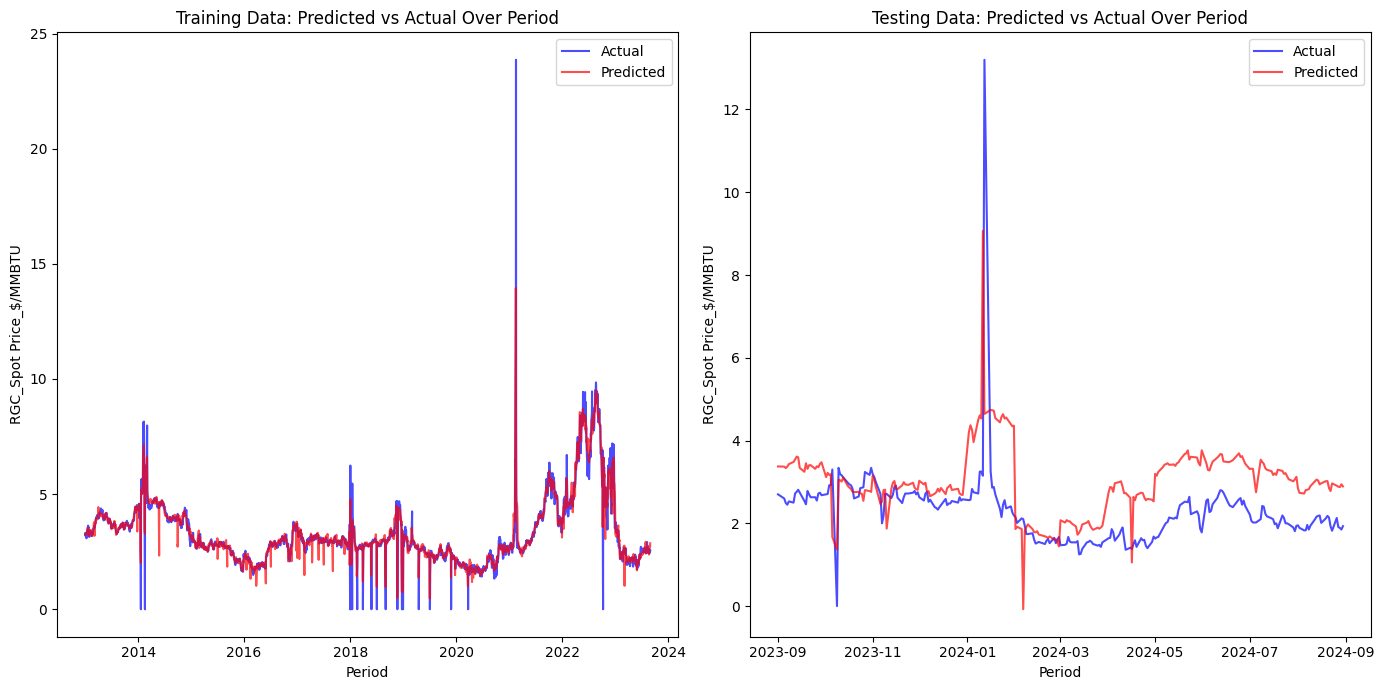

In [ ]:
# Plot predictions vs actuals over time
plt.figure(figsize=(14, 7))

# Training data plot
plt.subplot(1, 2, 1)
plt.plot(train_data['period'], y_train, label="Actual", alpha=0.7, color='blue')
plt.plot(train_data['period'], y_train_pred, label="Predicted", alpha=0.7, color='red')
plt.xlabel('Period')
plt.ylabel('RGC_Spot Price_$/MMBTU')
plt.title('Training Data: Predicted vs Actual Over Period')
plt.legend()

# Testing data plot
plt.subplot(1, 2, 2)
plt.plot(test_data['period'], y_test, label="Actual", alpha=0.7, color='blue')
plt.plot(test_data['period'], y_test_pred, label="Predicted", alpha=0.7, color='red')
plt.xlabel('Period')
plt.ylabel('RGC_Spot Price_$/MMBTU')
plt.title('Testing Data: Predicted vs Actual Over Period')
plt.legend()

plt.tight_layout()
plt.show()


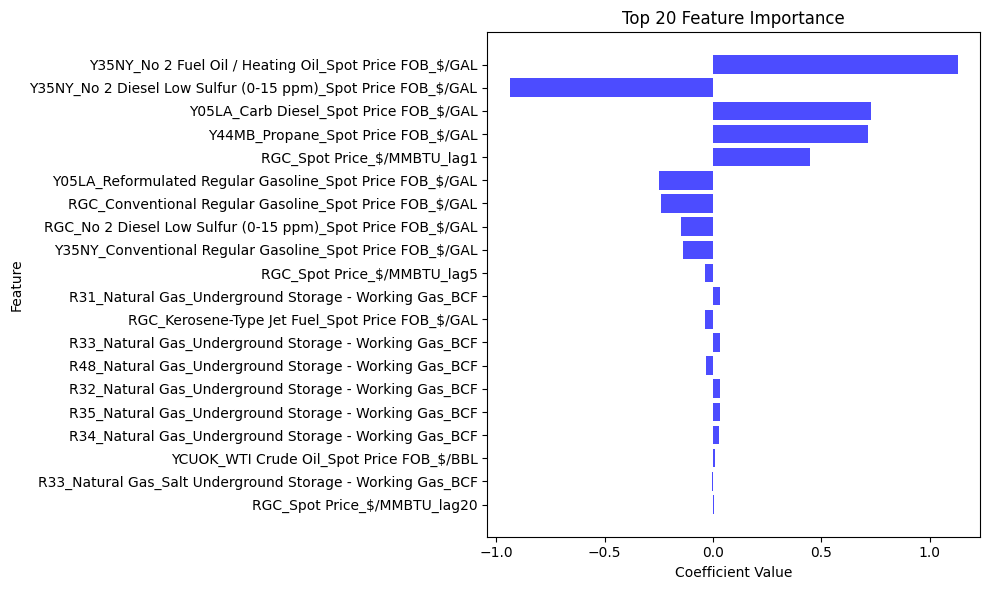

In [ ]:

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Sort by absolute value of the coefficients
feature_importance['AbsCoefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='AbsCoefficient', ascending=False)

# Select top N features
N = 20  # Adjust this number based on how many top features you want to visualize
top_features = feature_importance.head(N)

# Plot the top N features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='blue', alpha=0.7)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title(f'Top {N} Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.tight_layout()
plt.show()



In [ ]:

# Split the dataset into training and testing
last_12_month = model_data['month'].max() - pd.DateOffset(months=12)
train_data = model_data[model_data['month'] <= last_12_month]
test_data = model_data[model_data['month'] > last_12_month]

# Features and target variable
X_train = train_data.drop(columns=['RGC_Spot Price_$/MMBTU', 'month', 'period', 'week'])
y_train = train_data['RGC_Spot Price_$/MMBTU']
X_test = test_data.drop(columns=['RGC_Spot Price_$/MMBTU', 'month', 'period', 'week'])
y_test = test_data['RGC_Spot Price_$/MMBTU']

# Ensure all features and target are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Handle any remaining NaN values by filling them with 0 (or another strategy)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

# Train a Random Forest regression model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Train RMSE: 0.20
Test RMSE: 1.00


<ipython-input-18-553b2ba5fe5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['period'] = pd.to_datetime(train_data['period'], errors='coerce')
<ipython-input-18-553b2ba5fe5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['period'] = pd.to_datetime(test_data['period'], errors='coerce')


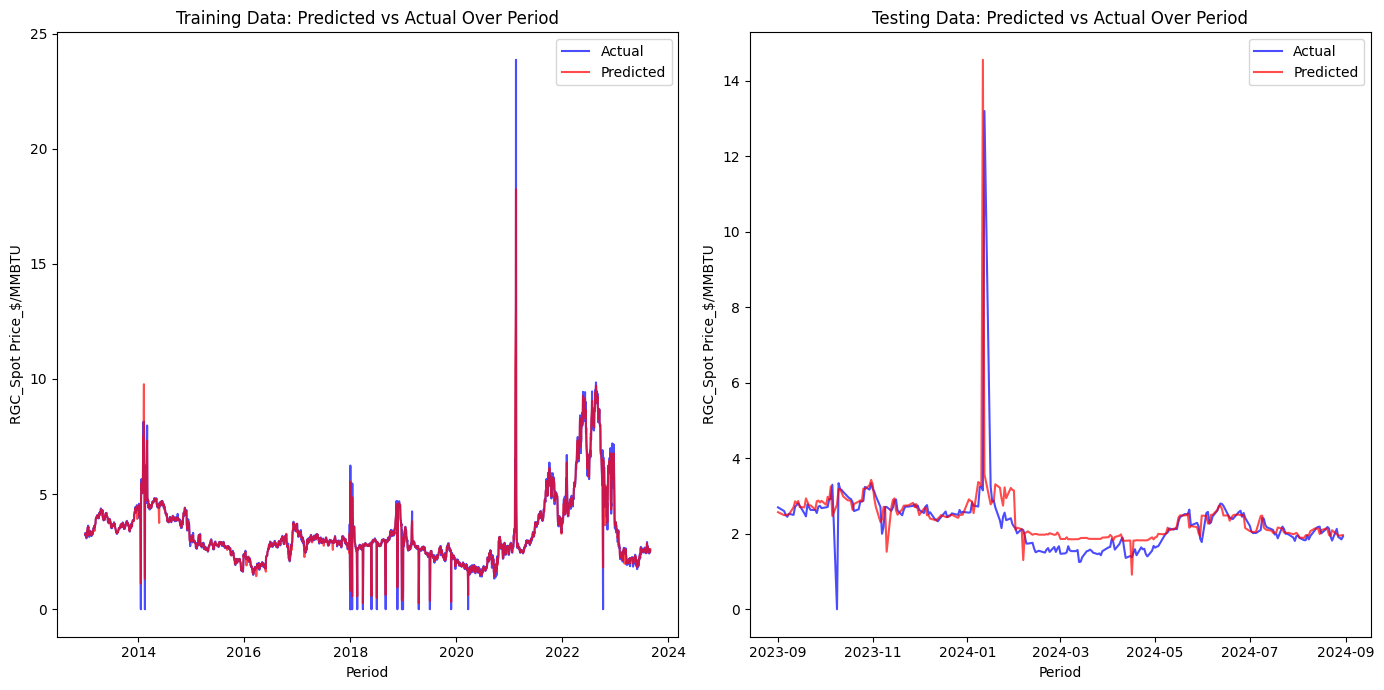

In [ ]:
# Ensure period column is datetime for plotting
train_data['period'] = pd.to_datetime(train_data['period'], errors='coerce')
test_data['period'] = pd.to_datetime(test_data['period'], errors='coerce')

# Reset index to align the indices for plotting
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Plot predictions vs actuals over time
plt.figure(figsize=(14, 7))

# Training data plot
plt.subplot(1, 2, 1)
plt.plot(train_data['period'], y_train, label="Actual", alpha=0.7, color='blue')
plt.plot(train_data['period'], y_train_pred, label="Predicted", alpha=0.7, color='red')
plt.xlabel('Period')
plt.ylabel('RGC_Spot Price_$/MMBTU')
plt.title('Training Data: Predicted vs Actual Over Period')
plt.legend()

# Testing data plot
plt.subplot(1, 2, 2)
plt.plot(test_data['period'], y_test, label="Actual", alpha=0.7, color='blue')
plt.plot(test_data['period'], y_test_pred, label="Predicted", alpha=0.7, color='red')
plt.xlabel('Period')
plt.ylabel('RGC_Spot Price_$/MMBTU')
plt.title('Testing Data: Predicted vs Actual Over Period')
plt.legend()

plt.tight_layout()
plt.show()

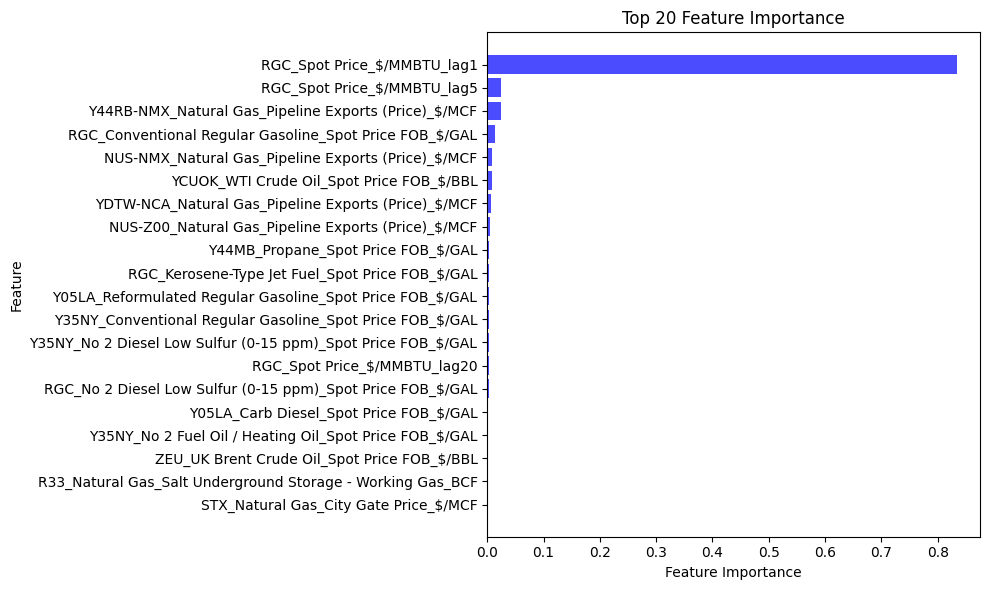

In [ ]:
# Feature importance visualization
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top N features
N = 20
top_features = feature_importance.head(N)

# Plot the top N features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='blue', alpha=0.7)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {N} Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.tight_layout()
plt.show()

In [ ]:

# Create a copy of model_data
df = model_data.copy()

# Ensure 'period' column is datetime
df['period'] = pd.to_datetime(df['period'], errors='coerce')

# Set 'period' as the index for time series modeling
df = df.set_index('period')

# Ensure the target column is numeric
df['RGC_Spot Price_$/MMBTU'] = pd.to_numeric(df['RGC_Spot Price_$/MMBTU'], errors='coerce')

# Split the dataset into training and testing sets
last_12_month = df.index.max() - pd.DateOffset(months=12)
train_data = df[df.index <= last_12_month]
test_data = df[df.index > last_12_month]

# Train an ARIMA model
arima_order = (5, 1, 0)  # ARIMA order (p, d, q)
arima_model = ARIMA(train_data['RGC_Spot Price_$/MMBTU'], order=arima_order)
arima_result = arima_model.fit()

# Generate rolling predictions for the test set
history = list(train_data['RGC_Spot Price_$/MMBTU'])
test_actuals = list(test_data['RGC_Spot Price_$/MMBTU'])
test_pred = []

for t in test_actuals:
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)[0]
    test_pred.append(forecast)
    history.append(t)  # Add the actual value to history

# Evaluate the model
train_pred = arima_result.predict(start=train_data.index[0], end=train_data.index[-1], dynamic=False)
train_rmse = np.sqrt(mean_squared_error(train_data['RGC_Spot Price_$/MMBTU'], train_pred))
test_rmse = np.sqrt(mean_squared_error(test_actuals, test_pred))
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Train RMSE: 0.58
Test RMSE: 0.83


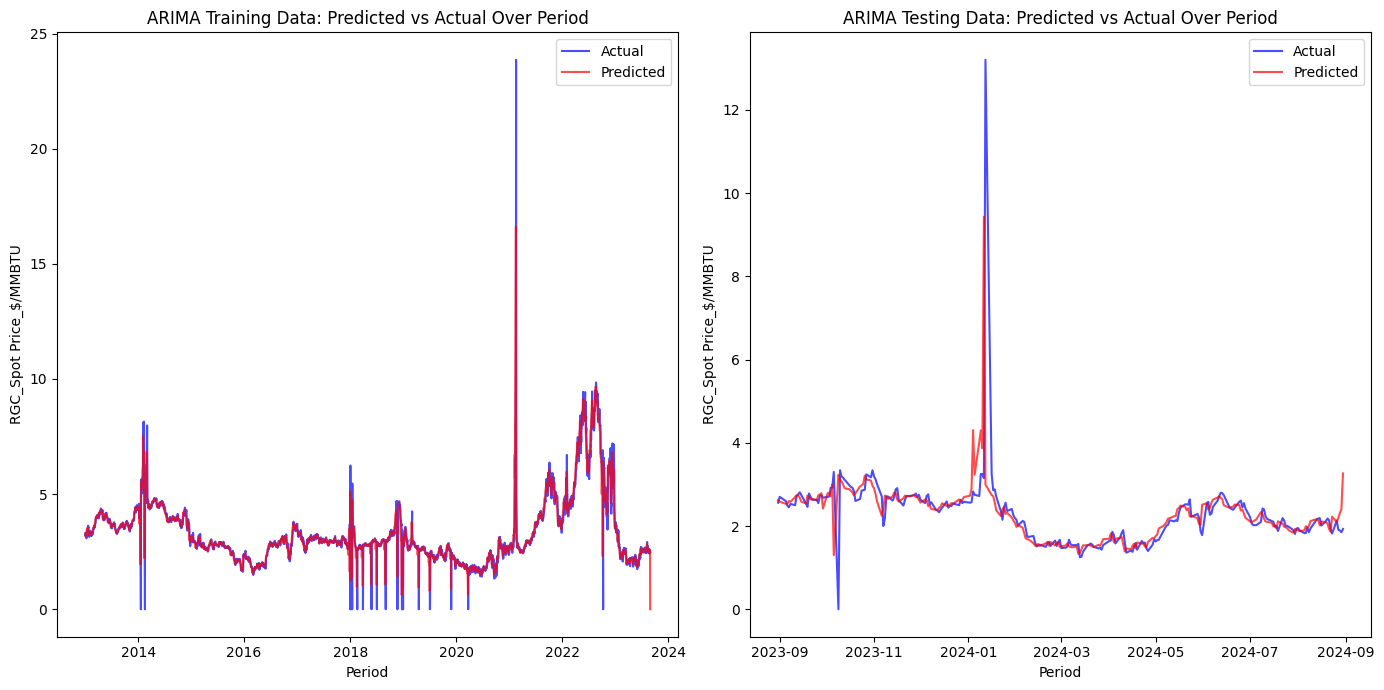

In [ ]:
# Plot ARIMA results
plt.figure(figsize=(14, 7))

# Training data ARIMA plot
plt.subplot(1, 2, 1)
plt.plot(train_data.index, train_data['RGC_Spot Price_$/MMBTU'], label="Actual", alpha=0.7, color='blue')
plt.plot(train_data.index, train_pred, label="Predicted", alpha=0.7, color='red')
plt.xlabel('Period')
plt.ylabel('RGC_Spot Price_$/MMBTU')
plt.title('ARIMA Training Data: Predicted vs Actual Over Period')
plt.legend()

# Testing data ARIMA plot
plt.subplot(1, 2, 2)
plt.plot(test_data.index, test_data['RGC_Spot Price_$/MMBTU'], label="Actual", alpha=0.7, color='blue')
plt.plot(test_data.index, test_pred, label="Predicted", alpha=0.7, color='red')
plt.xlabel('Period')
plt.ylabel('RGC_Spot Price_$/MMBTU')
plt.title('ARIMA Testing Data: Predicted vs Actual Over Period')
plt.legend()

plt.tight_layout()
plt.show()

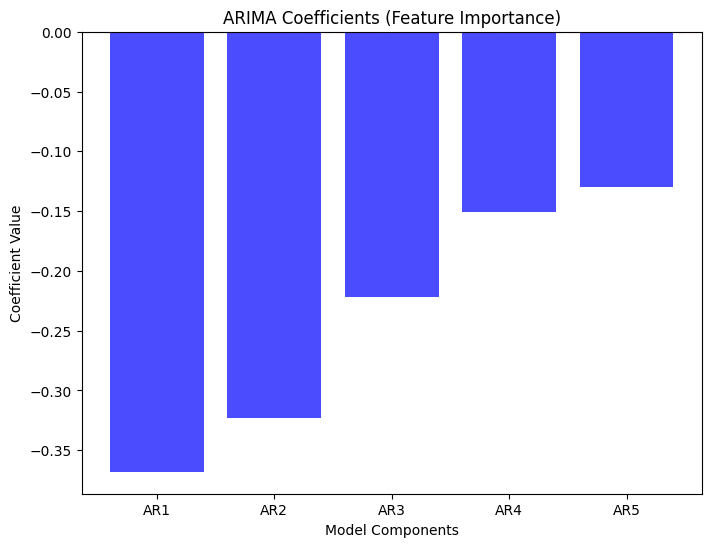

In [ ]:
# Extract ARIMA model parameters
ar_params = arima_result.arparams  # AR coefficients
ma_params = arima_result.maparams  # MA coefficients
coefficients = {'AR': ar_params, 'MA': ma_params}

# Prepare data for visualization
labels = []
values = []
for component, params in coefficients.items():
    for i, param in enumerate(params, start=1):
        labels.append(f"{component}{i}")
        values.append(param)

# Plot the coefficients
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('ARIMA Coefficients (Feature Importance)')
plt.ylabel('Coefficient Value')
plt.xlabel('Model Components')
plt.show()


In [ ]:

# Split the dataset into training and testing
last_12_month = model_data['month'].max() - pd.DateOffset(months=12)
train_data = model_data[model_data['month'] <= last_12_month]
test_data = model_data[model_data['month'] > last_12_month]

# Features and target variable
X_train = train_data.drop(columns=['RGC_Spot Price_$/MMBTU', 'month', 'period', 'week'])
y_train = train_data['RGC_Spot Price_$/MMBTU']
X_test = test_data.drop(columns=['RGC_Spot Price_$/MMBTU', 'month', 'period', 'week'])
y_test = test_data['RGC_Spot Price_$/MMBTU']

# Ensure all features and target are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Handle any remaining NaN values by filling them with 0 (or another strategy)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

# Train an XGBoost regression model
model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Train RMSE: 0.12
Test RMSE: 0.81


<ipython-input-24-553b2ba5fe5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['period'] = pd.to_datetime(train_data['period'], errors='coerce')
<ipython-input-24-553b2ba5fe5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['period'] = pd.to_datetime(test_data['period'], errors='coerce')


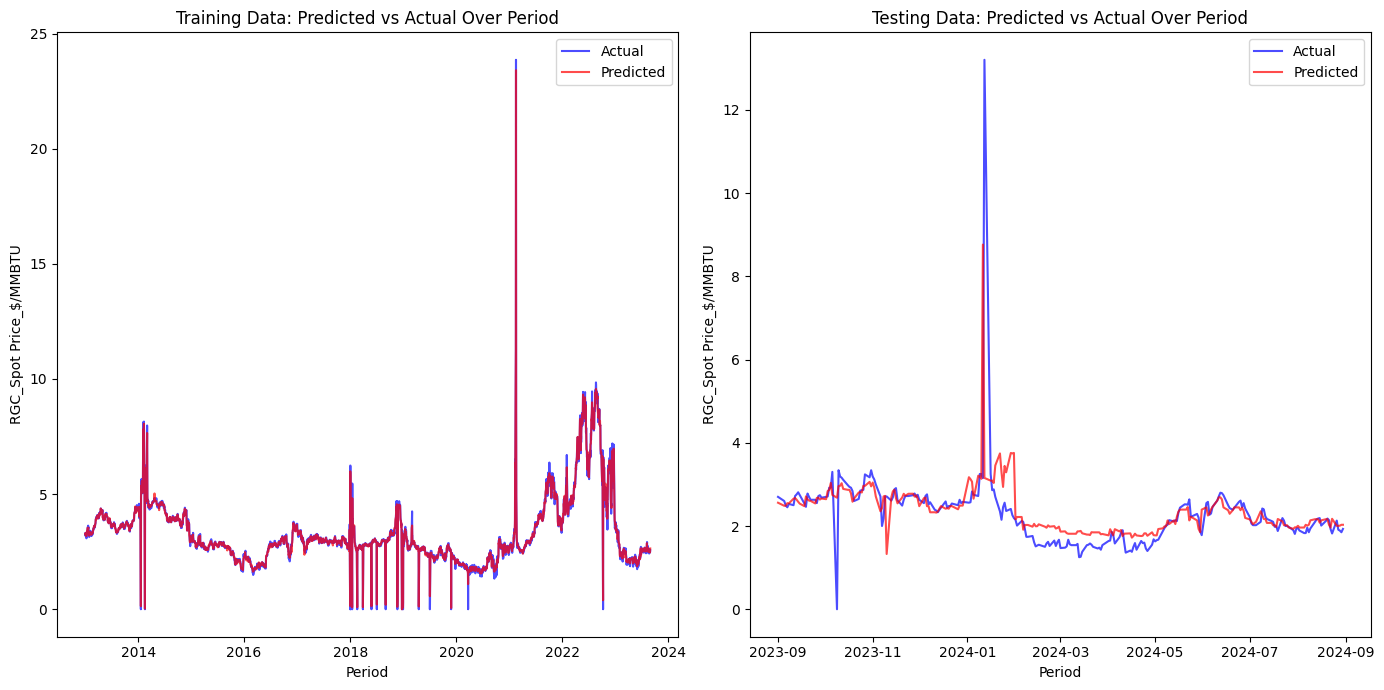

In [ ]:
# Ensure period column is datetime for plotting
train_data['period'] = pd.to_datetime(train_data['period'], errors='coerce')
test_data['period'] = pd.to_datetime(test_data['period'], errors='coerce')

# Reset index to align the indices for plotting
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Plot predictions vs actuals over time
plt.figure(figsize=(14, 7))

# Training data plot
plt.subplot(1, 2, 1)
plt.plot(train_data['period'], y_train, label="Actual", alpha=0.7, color='blue')
plt.plot(train_data['period'], y_train_pred, label="Predicted", alpha=0.7, color='red')
plt.xlabel('Period')
plt.ylabel('RGC_Spot Price_$/MMBTU')
plt.title('Training Data: Predicted vs Actual Over Period')
plt.legend()

# Testing data plot
plt.subplot(1, 2, 2)
plt.plot(test_data['period'], y_test, label="Actual", alpha=0.7, color='blue')
plt.plot(test_data['period'], y_test_pred, label="Predicted", alpha=0.7, color='red')
plt.xlabel('Period')
plt.ylabel('RGC_Spot Price_$/MMBTU')
plt.title('Testing Data: Predicted vs Actual Over Period')
plt.legend()

plt.tight_layout()
plt.show()

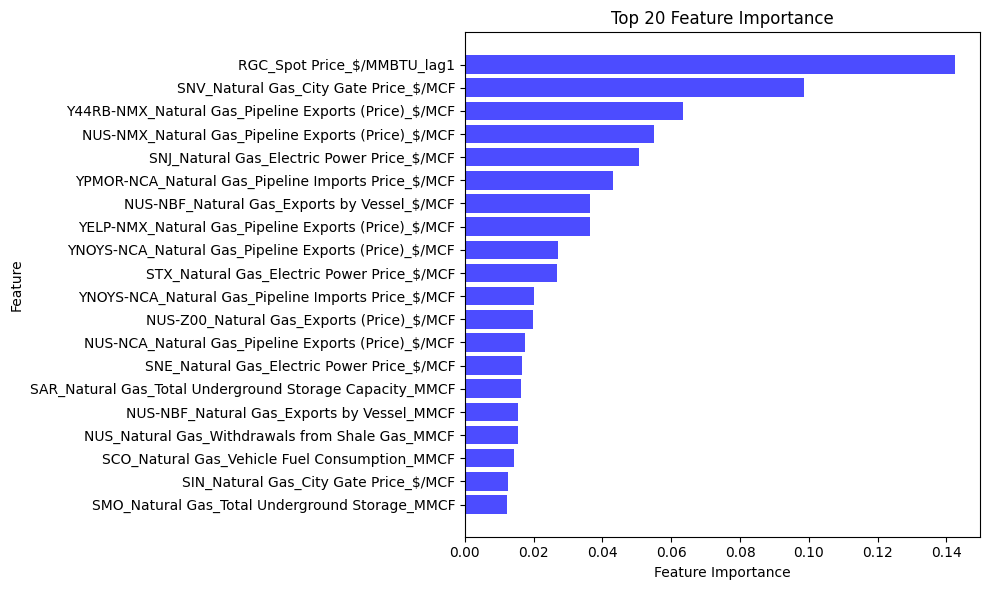

In [ ]:
# Feature importance visualization
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top N features
N = 20
top_features = feature_importance.head(N)

# Plot the top N features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='blue', alpha=0.7)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {N} Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.tight_layout()
plt.show()

In [ ]:

# Custom Random Search with Cross-Validation
class RandomSearchTunerCV:
    def __init__(self, model, param_grid, n_iter, scoring, cv=5, random_state=None):
        self.model = model
        self.param_grid = param_grid
        self.n_iter = n_iter
        self.scoring = scoring
        self.cv = cv
        self.random_state = random_state
        self.results = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        param_combinations = list(itertools.product(*self.param_grid.values()))
        sampled_combinations = np.random.choice(
            len(param_combinations), self.n_iter, replace=False
        )

        best_score = -np.inf if self.scoring == "neg_mean_squared_error" else np.inf
        best_params = None

        kf = KFold(n_splits=self.cv, shuffle=True, random_state=self.random_state)

        for idx in sampled_combinations:
            params = dict(zip(self.param_grid.keys(), param_combinations[idx]))
            self.model.set_params(**params)

            fold_scores = []
            for train_idx, valid_idx in kf.split(X):
                X_train_fold, X_valid_fold = X[train_idx], X[valid_idx]
                y_train_fold, y_valid_fold = y[train_idx], y[valid_idx]

                self.model.fit(X_train_fold, y_train_fold)
                y_valid_pred = self.model.predict(X_valid_fold)
                score = -mean_squared_error(y_valid_fold, y_valid_pred) if self.scoring == "neg_mean_squared_error" else mean_squared_error(y_valid_fold, y_valid_pred)
                fold_scores.append(score)

            avg_score = np.mean(fold_scores)
            self.results.append((params, avg_score))
            print(f"Params: {params}, Avg Score: {avg_score:.4f}")

            if self.scoring == "neg_mean_squared_error" and avg_score > best_score:
                best_score = avg_score
                best_params = params
            elif self.scoring != "neg_mean_squared_error" and avg_score < best_score:
                best_score = avg_score
                best_params = params

        self.best_params_ = best_params
        self.best_score_ = best_score

    def best_model(self):
        return self.model.set_params(**self.best_params_)


In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.5, 0.7, 1],
    "colsample_bytree": [0.5, 0.7, 1],
    "gamma": [0, 0.1, 0.5, 1],
}

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=42, objective="reg:squarederror")

# Use the custom random search tuner
random_search_cv = RandomSearchTunerCV(
    model=xgb,
    param_grid=param_grid,
    n_iter=25,  # Number of parameter combinations to try
    scoring="neg_mean_squared_error",
    cv=5,  # Number of folds for cross-validation
    random_state=42,
)

random_search_cv.fit(X_train.values, y_train.values)

# Output best parameters and score
print("\nBest Parameters:", random_search_cv.best_params_)
print(f"Best Validation RMSE: {(-random_search_cv.best_score_) ** 0.5:.4f}")

# Train the best model on the entire training set
best_model = random_search_cv.best_model()
best_model.fit(X_train, y_train)

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE (Best Model): {train_rmse:.2f}")
print(f"Test RMSE (Best Model): {test_rmse:.2f}")

Params: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 3, 'subsample': 0.5, 'colsample_bytree': 0.7, 'gamma': 0.5}, Avg Score: -0.5441
Params: {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.05, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 1, 'gamma': 0.5}, Avg Score: -0.2524
Params: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'min_child_weight': 1, 'subsample': 1, 'colsample_bytree': 1, 'gamma': 0.5}, Avg Score: -0.2991
Params: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': 0.1}, Avg Score: -0.2304
Params: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'min_child_weight': 1, 'subsample': 1, 'colsample_bytree': 0.7, 'gamma': 0.5}, Avg Score: -0.2652
Params: {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.2, 'min_child_weight': 5, 'subsample': 0.5, 'colsample_bytree': 1, 'gamma': 1}, Avg Score: -0.2287
P

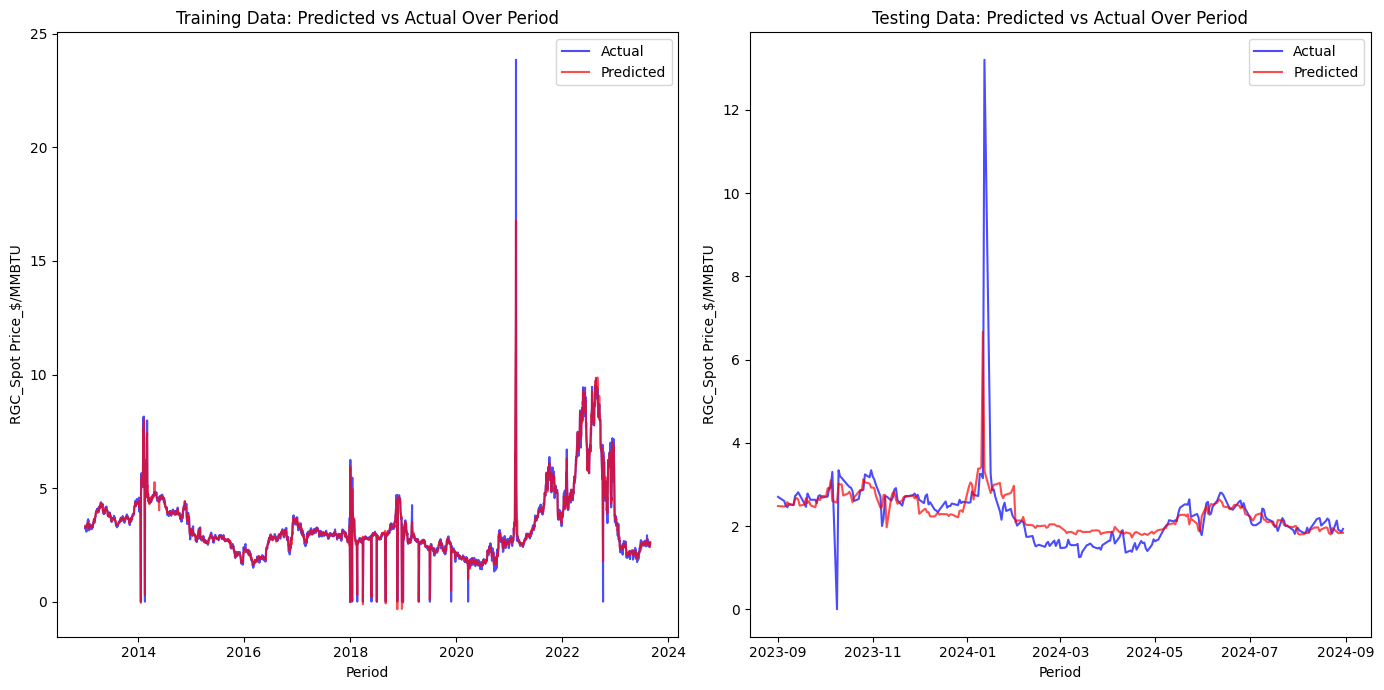

In [ ]:
# Plot predictions vs actuals over the period
plt.figure(figsize=(14, 7))

# Training data plot
plt.subplot(1, 2, 1)
plt.plot(train_data["period"], y_train, label="Actual", alpha=0.7, color="blue")
plt.plot(train_data["period"], y_train_pred, label="Predicted", alpha=0.7, color="red")
plt.xlabel("Period")
plt.ylabel("RGC_Spot Price_$/MMBTU")
plt.title("Training Data: Predicted vs Actual Over Period")
plt.legend()

# Testing data plot
plt.subplot(1, 2, 2)
plt.plot(test_data["period"], y_test, label="Actual", alpha=0.7, color="blue")
plt.plot(test_data["period"], y_test_pred, label="Predicted", alpha=0.7, color="red")
plt.xlabel("Period")
plt.ylabel("RGC_Spot Price_$/MMBTU")
plt.title("Testing Data: Predicted vs Actual Over Period")
plt.legend()

plt.tight_layout()
plt.show()

#Forecasting Future Gas Prices Using XGBoost
This section implements the XGBoost model with the best hyperparameters identified earlier to forecast future gas prices recurrently. The methodology focuses on multistep forecasting for multiple horizons using historical gas price data, with a forecast horizon of 5 days. Model performance is evaluated for each horizon using known datasets, ensuring robust analysis of short-term predictions.

##Methodology

###Data Preparation
**Sequence Creation:**
Using a rolling window approach, sequences of look_back = 10 days were created as input features to predict the next forecast_horizon = 5 days' gas prices.
This ensures that the model learns temporal patterns effectively.

**Scaling:**
Input features (X) and target values (y) were normalized using Min-Max scaling to improve model efficiency and convergence during training.

##Model Training and Prediction
###Model Training:
The XGBoost model with optimized parameters (n_estimators=200, max_depth=7, learning_rate=0.05, etc.) was trained on the scaled training data.
The model was trained to predict the first horizon (1-day ahead) using the input sequences.
###Recurrent Predictions:
Predictions were made iteratively for all 5 horizons, allowing the model to forecast further into the future based on learned patterns.

Predictions were inverse-transformed back to the original scale for meaningful evaluation.

##Results and Analysis
###Performance Across Horizons

Horizon 1 (Day 1):
The model performs best for the first horizon, achieving the lowest test RMSE (0.45). This indicates strong short-term prediction capabilities.

Longer Horizons:
Test RMSE increases gradually for longer horizons, reaching 0.60 for Day 5.

This trend reflects the compounding effect of errors in multistep forecasting, as the model uses predictions from prior steps to forecast further into the future.
###Train-Test Comparison

The gap between train and test RMSE is small across all horizons, demonstrating that the model generalizes well and avoids overfitting.

However, the slight increase in train RMSE for longer horizons (from 0.12 to 0.91) indicates diminishing confidence as predictions extend further.
###Multistep Forecasting Challenges

Forecasting further into the future inherently introduces more uncertainty and error propagation, which is evident from the increasing RMSE values for later horizons.

Despite this, the model maintains reasonable accuracy even for the 5th horizon.

In [ ]:

# Function to create sequences for multiple horizons
def create_sequences_multistep(data, target_col, look_back, forecast_horizon):
    X, y = [], []
    for i in range(len(data) - look_back - forecast_horizon):
        seq = data.iloc[i:i + look_back][target_col].values
        targets = data.iloc[i + look_back:i + look_back + forecast_horizon][target_col].values
        X.append(seq)
        y.append(targets)
    return np.array(X), np.array(y)

# Parameters
look_back = 10
forecast_horizon = 5
target_col = 'RGC_Spot Price_$/MMBTU'

# Copy the data
model_data_copy = model_data.copy()

# Create sequences
X, y = create_sequences_multistep(model_data_copy, target_col, look_back, forecast_horizon)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).reshape(y_train.shape)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

# Train an XGBoost model
best_model = XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.05, random_state=42)
best_model.fit(X_train_scaled.reshape(X_train_scaled.shape[0], -1), y_train_scaled[:, 0])

# Make predictions for all horizons
y_train_pred_scaled = np.array([
    best_model.predict(X_train_scaled.reshape(X_train_scaled.shape[0], -1))
    for _ in range(forecast_horizon)
]).T
y_test_pred_scaled = np.array([
    best_model.predict(X_test_scaled.reshape(X_test_scaled.shape[0], -1))
    for _ in range(forecast_horizon)
]).T

# Inverse transform predictions and actuals
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_train_actual = scaler_y.inverse_transform(y_train_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

# Calculate RMSE for each horizon
train_rmse_horizons = [
    np.sqrt(mean_squared_error(y_train_actual[:, i], y_train_pred[:, i]))
    for i in range(forecast_horizon)
]
test_rmse_horizons = [
    np.sqrt(mean_squared_error(y_test_actual[:, i], y_test_pred[:, i]))
    for i in range(forecast_horizon)
]

# Print RMSE for each horizon
for i in range(forecast_horizon):
    print(f"Horizon {i + 1} Day - Train RMSE: {train_rmse_horizons[i]:.2f}, Test RMSE: {test_rmse_horizons[i]:.2f}")

Horizon 1 Day - Train RMSE: 0.12, Test RMSE: 0.45
Horizon 2 Day - Train RMSE: 0.69, Test RMSE: 0.51
Horizon 3 Day - Train RMSE: 0.83, Test RMSE: 0.53
Horizon 4 Day - Train RMSE: 0.87, Test RMSE: 0.57
Horizon 5 Day - Train RMSE: 0.91, Test RMSE: 0.60


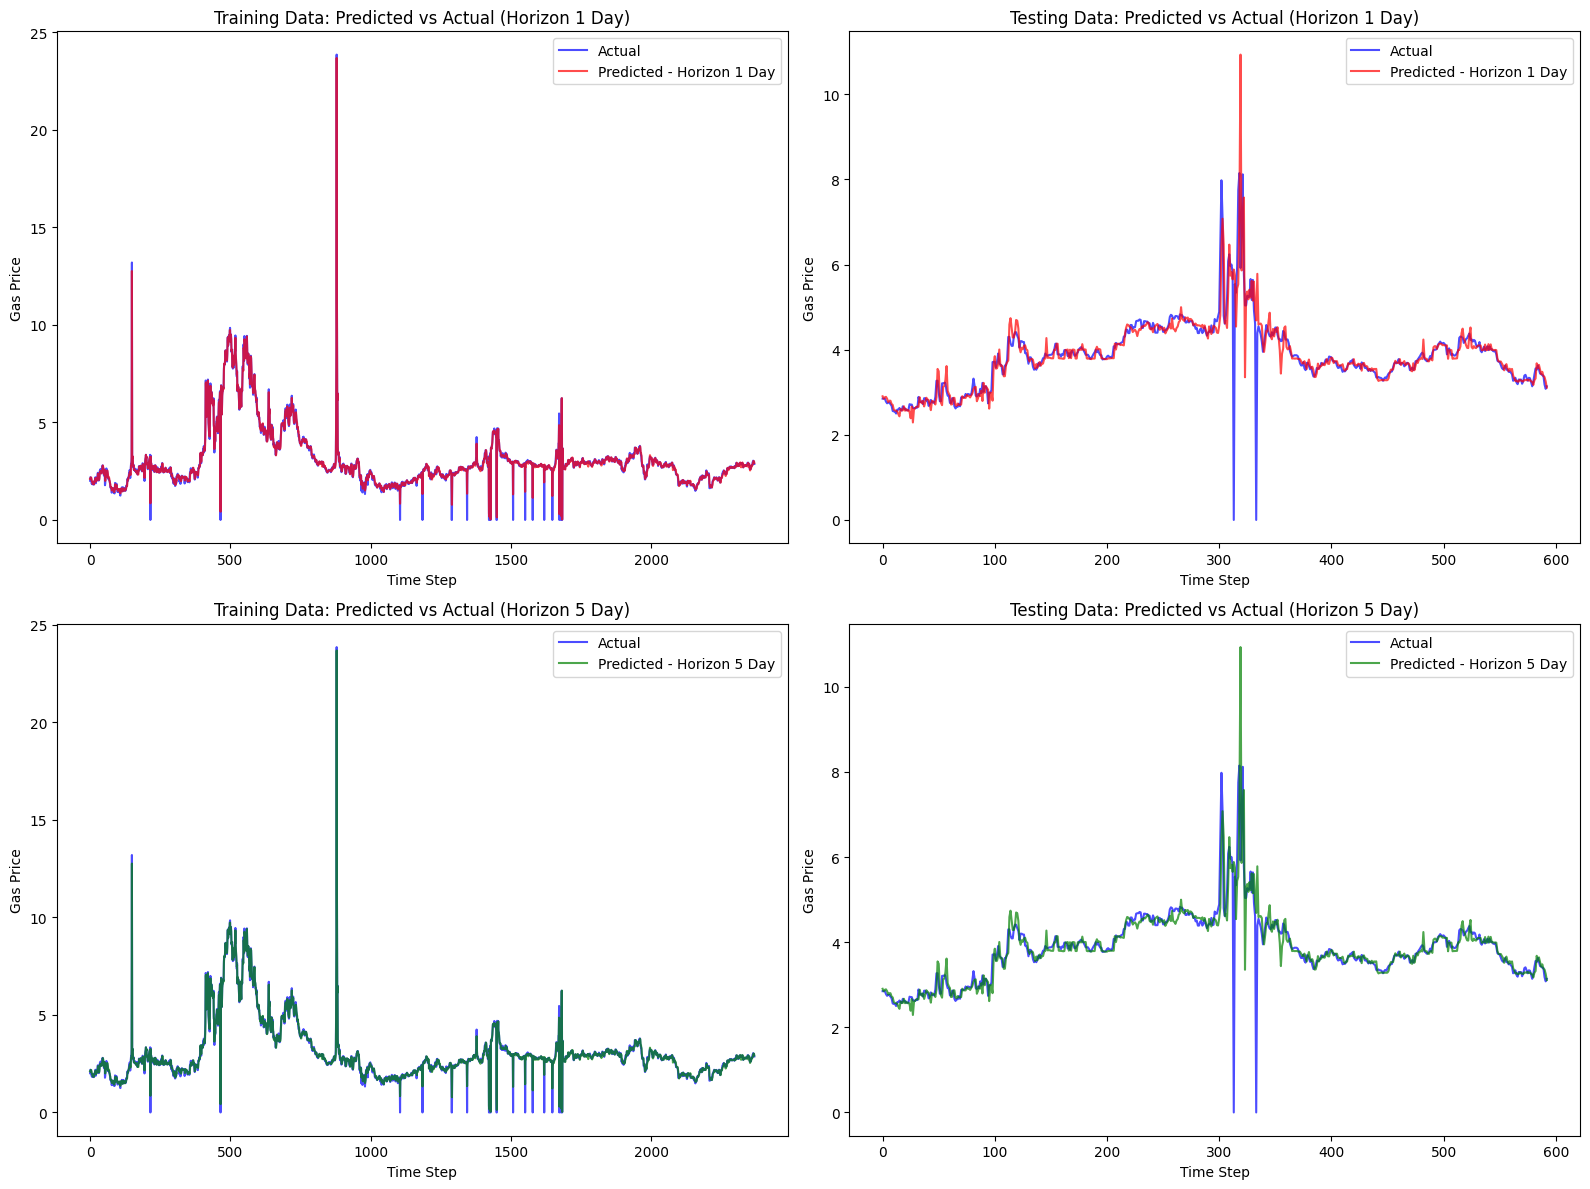

In [ ]:
plt.figure(figsize=(16, 12))

# 1. Training Data - Horizon 1 Day
plt.subplot(2, 2, 1)
plt.plot(range(len(y_train_actual)), y_train_actual[:, 0], label="Actual", color='blue', alpha=0.7)
plt.plot(range(len(y_train_pred)), y_train_pred[:, 0], label="Predicted - Horizon 1 Day", color='red', alpha=0.7)
plt.title('Training Data: Predicted vs Actual (Horizon 1 Day)')
plt.xlabel('Time Step')
plt.ylabel('Gas Price')
plt.legend()

# 2. Testing Data - Horizon 1 Day
plt.subplot(2, 2, 2)
plt.plot(range(len(y_test_actual)), y_test_actual[:, 0], label="Actual", color='blue', alpha=0.7)
plt.plot(range(len(y_test_pred)), y_test_pred[:, 0], label="Predicted - Horizon 1 Day", color='red', alpha=0.7)
plt.title('Testing Data: Predicted vs Actual (Horizon 1 Day)')
plt.xlabel('Time Step')
plt.ylabel('Gas Price')
plt.legend()

# 3. Training Data - Horizon 5 Day
plt.subplot(2, 2, 3)
plt.plot(range(len(y_train_actual)), y_train_actual[:, 0], label="Actual", color='blue', alpha=0.7)
plt.plot(range(len(y_train_pred)), y_train_pred[:, 4], label="Predicted - Horizon 5 Day", color='green', alpha=0.7)
plt.title('Training Data: Predicted vs Actual (Horizon 5 Day)')
plt.xlabel('Time Step')
plt.ylabel('Gas Price')
plt.legend()

# 4. Testing Data - Horizon 5 Day
plt.subplot(2, 2, 4)
plt.plot(range(len(y_test_actual)), y_test_actual[:, 0], label="Actual", color='blue', alpha=0.7)
plt.plot(range(len(y_test_pred)), y_test_pred[:, 4], label="Predicted - Horizon 5 Day", color='green', alpha=0.7)
plt.title('Testing Data: Predicted vs Actual (Horizon 5 Day)')
plt.xlabel('Time Step')
plt.ylabel('Gas Price')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-31-726eb369aefc>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data_scaled[-1] = next_pred_scaled  # Insert the predicted value


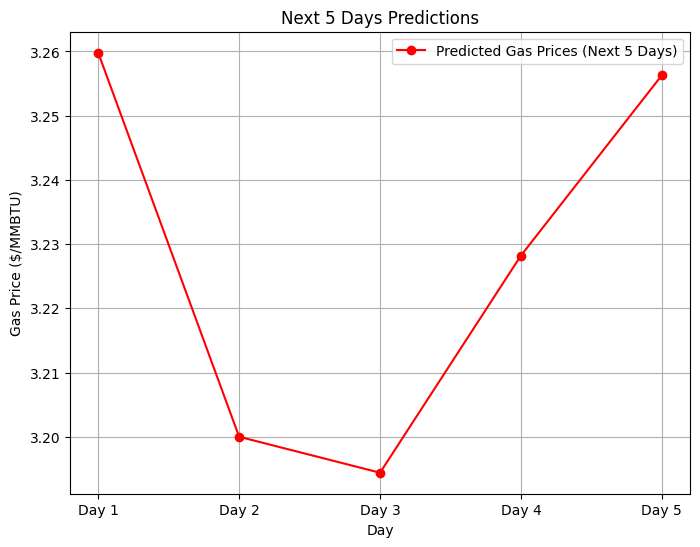

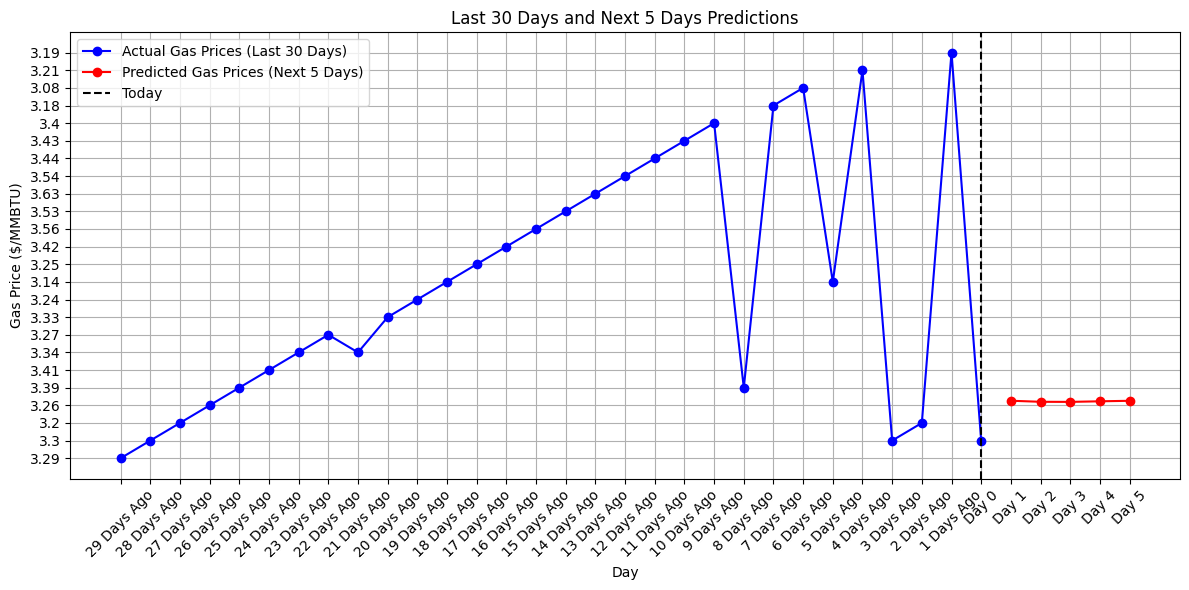

In [ ]:

# Prepare the last data for prediction (use only numeric features)
last_data = model_data_copy.iloc[-look_back:][target_col].values.reshape(-1, 1)
last_data_scaled = scaler_y.transform(last_data).flatten()

# Predict iteratively for the next 5 days
predictions_scaled = []
for i in range(5):
    # Flatten the scaled last_data to match the model's input format
    last_data_flattened = last_data_scaled.reshape(1, -1)

    # Predict the next day's price
    next_pred_scaled = best_model.predict(last_data_flattened)
    predictions_scaled.append(next_pred_scaled[0])

    # Update the data with the new prediction
    last_data_scaled = np.roll(last_data_scaled, -1)  # Shift the array
    last_data_scaled[-1] = next_pred_scaled  # Insert the predicted value

# Scale back the predictions to original values
predictions = scaler_y.inverse_transform(np.array(predictions_scaled).reshape(-1, 1)).flatten()

# Prepare actual gas prices for the last 30 days
last_30_days_actual = model_data_copy.iloc[-30:][target_col].values

# Plot only the next 5 days
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), predictions, label="Predicted Gas Prices (Next 5 Days)", color='red', marker='o')
plt.title("Next 5 Days Predictions")
plt.xlabel("Day")
plt.ylabel("Gas Price ($/MMBTU)")
plt.xticks(range(1, 6), labels=["Day 1", "Day 2", "Day 3", "Day 4", "Day 5"])
plt.grid()
plt.legend()
plt.show()

# Plot last 30 days and next 5 days
plt.figure(figsize=(12, 6))
context_days = list(range(-29, 1))  # Last 30 days
prediction_days = list(range(1, 6))  # Next 5 days

plt.plot(context_days, last_30_days_actual, label="Actual Gas Prices (Last 30 Days)", color='blue', marker='o')
plt.plot(prediction_days, predictions, label="Predicted Gas Prices (Next 5 Days)", color='red', marker='o')
plt.axvline(x=0, color='black', linestyle='--', label="Today")
plt.title("Last 30 Days and Next 5 Days Predictions")
plt.xlabel("Day")
plt.ylabel("Gas Price ($/MMBTU)")
plt.xticks(context_days + prediction_days, labels=[
    f"{abs(i)} Days Ago" if i < 0 else f"Day {i}" for i in context_days + prediction_days
], rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
import joblib
import os

# Save the trained model
joblib.dump(best_model, "trained_xgboost_model.pkl")
print("Trained model saved as 'trained_xgboost_model.pkl'")

# Save the scalers
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")
print("Scalers saved as 'scaler_X.pkl' and 'scaler_y.pkl'")

# Current day and today's gas price
current_day = str(model_data_copy.iloc[0]['period'])  # First row is the current day (convert to string)
today_gas_price = model_data_copy.iloc[0][target_col]

# Create a dictionary for the new prediction
predictions_dict = {
    "Period": current_day,
    "Today's Gas Price ($/MMBTU)": today_gas_price,
    "Predicted Next 1 Day ($/MMBTU)": predictions[0],
    "Predicted Next 2 Day ($/MMBTU)": predictions[1],
    "Predicted Next 3 Day ($/MMBTU)": predictions[2],
    "Predicted Next 4 Day ($/MMBTU)": predictions[3],
    "Predicted Next 5 Day ($/MMBTU)": predictions[4],
}

# File to save the data
filename = "gas_price_predictions.csv"

# Check if the file exists
if os.path.exists(filename):
    # Read the existing file
    existing_data = pd.read_csv(filename)

    # Ensure Period column is in string format for comparison
    existing_data['Period'] = existing_data['Period'].astype(str)

    # Check if the current day is already present
    if current_day in existing_data['Period'].values:
        print(f"Predictions for {current_day} are already saved in '{filename}'.")
    else:
        # Append the new data
        updated_data = pd.concat([existing_data, pd.DataFrame([predictions_dict])], ignore_index=True)
        updated_data.to_csv(filename, index=False)
        print(f"Gas price predictions for {current_day} added to '{filename}'.")
else:
    # Create a new file with the current predictions
    updated_data = pd.DataFrame([predictions_dict])
    updated_data.to_csv(filename, index=False)
    print(f"New file created and gas price predictions for {current_day} saved in '{filename}'")

# Print saved information
print("\nSaved Information:")
updated_data


Trained model saved as 'trained_xgboost_model.pkl'
Scalers saved as 'scaler_X.pkl' and 'scaler_y.pkl'
Predictions for 2024-08-30 00:00:00 are already saved in 'gas_price_predictions.csv'.

Saved Information:


,Period,Today's Gas Price ($/MMBTU),Predicted Next 1 Day ($/MMBTU),Predicted Next 2 Day ($/MMBTU),Predicted Next 3 Day ($/MMBTU),Predicted Next 4 Day ($/MMBTU),Predicted Next 5 Day ($/MMBTU)
0,2024-08-30 00:00:00,1.93,3.259807,3.200011,3.19441,3.228218,3.256301


#Future Improvements
##Exploratory Data Analysis
Include more visualizations to examines patterns, trends, and correlations in the dataset.

**Key Rationale:**

a) Identifies seasonal trends in storage levels and pricing.

b) Correlation analysis highlights predictors for price movement (e.g., exports, storage).

c)Outliers (e.g., extreme spot price spikes) are flagged for further scrutiny.

##Modeling:
###Feature Enhancements:
Include additional features like seasonal indicators, storage levels, and related commodity prices to improve predictive performance.
###Horizon-Specific Models:
Train separate models for each forecast horizon to address horizon-specific challenges and potentially improve accuracy for longer horizons.
###Probabilistic Forecasting:
Use techniques like quantile regression or Bayesian models to provide prediction intervals and quantify uncertainty for longer-term forecasts.
###Hybrid Approaches:
Combine XGBoost with time-series models (e.g., ARIMA or LSTM) to leverage strengths of both approaches in capturing temporal and nonlinear patterns.

##Modeling Pipeline
**Integrating MLflow into the pipeline** offers the opportunity to streamline and automate the process of training, validating, and deploying predictive models for natural gas price forecasting.

By leveraging MLflow to automate weekly training pipelines and daily data extraction and predictions, the forecasting process becomes scalable, efficient, and adaptable to the dynamic nature of natural gas markets. This ensures timely and accurate insights, enabling businesses to stay competitive in volatile environments.